In this worked notebook file,the Logistic Regression algorithm is applied to a dataset called wildfires.

The dataset has already been split into two different sets: one for training (wildfires_training.csv) and one for testing (wildfires_test.csv)

The dependent variable that we are trying to predict is fire, which can be one of 2 classes: yes or no.

In [1]:
import pandas as pd

# details for steel dataset
training_file = "steel_training.csv"
test_file = "steel_test.csv"
independent_cols = ["normalising_temperature", "tempering_temperature", "percent_silicon", "percent_chromium", "percent_copper", "percent_nickel", "percent_sulphur", "percent_carbon", "percent_manganese"]

dependent_col = "tensile_strength"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [2]:
# set up a matrix X containing the independent variables from the training data
X_training = df_training.loc[:,independent_cols]
print(X_training.head())
print(X_training.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [3]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_training = df_training.loc[:,dependent_col]
print(y_training.head())
print(y_training.shape)

0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object
(154,)


In [4]:
# Next we load our test dataset
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [5]:
# set up a matrix X containing the independent variables from the test data
X_test = df_test.loc[:,independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [6]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_test = df_test.loc[:,dependent_col]
print(y_test.head())
print(y_test.shape)

0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object
(50,)


No hyperparameter tuning, default skikit-learn implementation

In [7]:
from sklearn import metrics
from sklearn.svm import SVC

# create a logistic regression model using default settings
#set max_iter to 100000 to allow the model to converge properly
model = SVC()
model.fit(X_training, y_training)

# compute predictions for training and test sets
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# compute accuracy for training and test sets
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print("Accuracy on training data:", accuracy_training)
print("Accuracy on test data:", accuracy_test)

Accuracy on training data: 0.512987012987013
Accuracy on test data: 0.56


Now we test the effect of hyperparameter tuning on the SVM model. We will use the RBF kernel and vary the values of C and gamma to see how they affect the accuracy of the model on both the training and test datasets.

In [8]:
from sklearn.svm import SVC
from sklearn import metrics

c_values =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

accuracy_training_c_gamma = []
accuracy_test_c_gamma = []

for g in gamma_values:
    acc_train = []
    acc_test = []
    for c in c_values:
        model_c_gamma = SVC(kernel="rbf", C=c, gamma=g)
        model_c_gamma.fit(X_training, y_training)
        predictions_train_c_gamma = model_c_gamma.predict(X_training)
        predictions_test_c_gamma = model_c_gamma.predict(X_test)

        acc_train.append(metrics.accuracy_score(y_training, predictions_train_c_gamma))
        acc_test.append(metrics.accuracy_score(y_test, predictions_test_c_gamma))

    accuracy_training_c_gamma.append(acc_train)
    accuracy_test_c_gamma.append(acc_test)

print("Training accuracies (per gamma value):", accuracy_training_c_gamma)
print("Test accuracies (per gamma value):", accuracy_test_c_gamma)



Training accuracies (per gamma value): [[0.512987012987013, 0.512987012987013, 0.512987012987013, 0.8701298701298701, 0.8831168831168831, 0.922077922077922, 0.9935064935064936, 1.0, 1.0, 1.0], [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.577922077922078, 0.974025974025974, 1.0, 1.0, 1.0, 1.0, 1.0], [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
Test accuracies (per gamma value): [[0.56, 0.56, 0.56, 0.84, 0.82, 0.74, 0.74, 0.7, 0.7, 0.7], [0.56, 0.56, 0.56, 0.58, 0.82, 0.7, 0.7, 0.7, 0.7, 0.7], [0.56, 0.56, 0.56, 0.56, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52], [0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.

In [ ]:
Plotting the comparision of training and test accuracy for different values of C and gamma

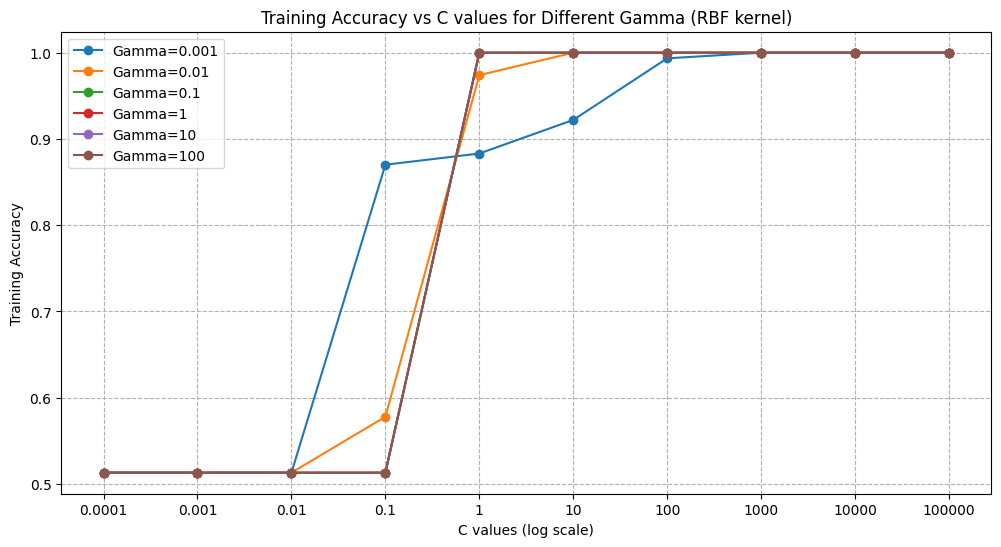

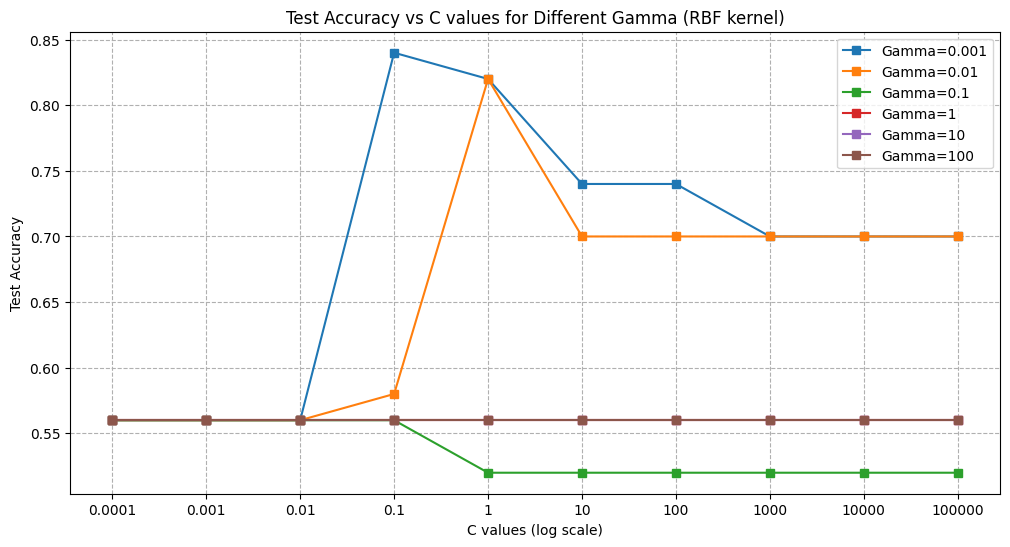

In [9]:
import matplotlib.pyplot as plt

# Training accuracy
plt.figure(figsize=(12,6))
for i, g in enumerate(gamma_values):
    plt.plot(c_values, accuracy_training_c_gamma[i], marker="o", label=f"Gamma={g}")
plt.xscale('log')  # logarithmic x-axis for C
plt.xticks(c_values, c_values)
plt.xlabel("C values (log scale)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs C values for Different Gamma (RBF kernel)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Test accuracy
plt.figure(figsize=(12,6))
for i, g in enumerate(gamma_values):
    plt.plot(c_values, accuracy_test_c_gamma[i], marker="s", label=f"Gamma={g}")
plt.xscale('log')  # logarithmic x-axis for C
plt.xticks(c_values, c_values)
plt.xlabel("C values (log scale)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs C values for Different Gamma (RBF kernel)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Here we create a pandas dataframe to better visualize the raw results of the hyperparameter tuning

In [12]:
import pandas as pd
pd.set_option('display.width', 1000)
results = []
for i, g in enumerate(gamma_values):
    for j, c in enumerate(c_values):
        results.append({
            "Gamma": g,
            "C": c,
            "Test Accuracy": accuracy_test_c_gamma[i][j]
        })

df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index="Gamma", columns="C", values="Test Accuracy")
print(df_pivot)

C        0.0001       0.0010       0.0100       0.1000       1.0000       10.0000      100.0000     1000.0000    10000.0000   100000.0000
Gamma                                                                                                                                    
0.001           0.56         0.56         0.56         0.84         0.82         0.74         0.74         0.70         0.70         0.70
0.010           0.56         0.56         0.56         0.58         0.82         0.70         0.70         0.70         0.70         0.70
0.100           0.56         0.56         0.56         0.56         0.52         0.52         0.52         0.52         0.52         0.52
1.000           0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56
10.000          0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56         0.56
100.000         0.56         0.56 